# Load libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing # for standardizing numerical variables
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import collections
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing Train & Test data

In [2]:
Train_data = pd.read_csv('F:\\Noodle.ai\\ManufacturingQuality\\TrainingSet.csv',header=0, encoding='UTF-8') 
Test_data = pd.read_csv('F:\\Noodle.ai\\ManufacturingQuality\\TestingSet.csv',header=0, encoding='UTF-8')

# Considering "Bad" as positive and "Good" as Negative because need to build a model that can detect a bad device

In [3]:
cost_FP = 500 # cost of testing a good device classified as bad is $500
cost_FN = 5000 # cost of testing a bad device classified as good is $5000

# Checking dimensions of Train & Test

In [4]:
print("Train dim " , Train_data.shape)
print("Test dim " , Test_data.shape)

Train dim  (3722, 220)
Test dim  (400, 220)


# Checking datatypes of Train & Test

In [5]:
print("Train datatypes " , Train_data.dtypes)
print("Test datatypes " , Test_data.dtypes)

Train datatypes  V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
V29              float64
V30              float64
                  ...   
V191             float64
V192             float64
V193             float64
V194             float64
V195             float64
V196             float64
V197             float64
V198             float64
V199    

# Converting Target Variable datatype to factor

In [6]:
Train_data.Machine_State = Train_data.Machine_State.astype('category')

In [7]:
#Checking whether Response variable data distribution is balanced or not
print(pd.value_counts(Train_data['Machine_State']))

Good    3240
Bad      463
Name: Machine_State, dtype: int64


# Plotting Target variable data distribution for visualization

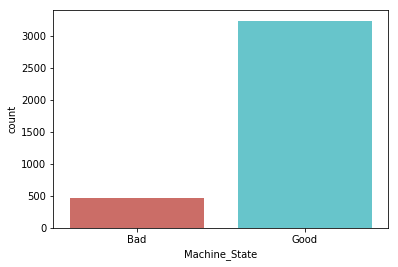

In [8]:
sns.countplot(x='Machine_State', data =Train_data,palette= 'hls')
plt.show()
plt.savefig('count_plot')

# Sum of Null values per column on training data set

In [9]:

null_columns=Train_data.columns[Train_data.isnull().any()]
Train_data[null_columns].isnull().sum()

V1               56
V8               56
V15              56
V22              56
V29              56
V36              56
V43              56
V50              56
V57              56
V64              56
V71              56
V78              56
V85              56
V92              56
V99              56
V106             56
V113             56
V120             56
V127             56
V134             56
V141             56
V148             56
V155             56
V162             56
V169             56
V176             56
V183             56
V190             56
V197             56
V205             56
V213             56
Machine_State    19
dtype: int64

In [132]:
## Sum of Null values per column on test data set
null_columns=Test_data.columns[Test_data.isnull().any()]
Test_data[null_columns].isnull().sum()

V1      5
V8      5
V15     5
V22     5
V29     5
V36     5
V43     5
V50     5
V57     5
V64     5
V71     5
V78     5
V85     5
V92     5
V99     5
V106    5
V113    5
V120    5
V127    5
V134    5
V141    5
V148    5
V155    5
V162    5
V169    5
V176    5
V183    5
V190    5
V197    5
V205    5
V213    5
dtype: int64

# imputing Na with it's column mean

In [10]:
Train_imputedSet=  Train_data.fillna(Train_data.mean())
Test_imputedSet=  Test_data.fillna(Test_data.mean())

In [11]:
## Verifying if any null value exists for Train data
null_columns=Train_imputedSet.columns[Train_imputedSet.isnull().any()]
Train_imputedSet[null_columns].isnull().sum()

Machine_State    19
dtype: int64

In [12]:
## Verifying if any null value exists for Test data
null_columns=Test_imputedSet.columns[Test_imputedSet.isnull().any()]
Test_imputedSet[null_columns].isnull().sum()

Series([], dtype: float64)

# Checking Test data dimension and column names

In [13]:
print(Test_imputedSet.shape)
print(Test_imputedSet.columns)

(400, 220)
Index(['Sl No.', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218',
       'V219'],
      dtype='object', length=220)


In [14]:
#Remove the irrelevant column from Testdataset
X_test = Test_imputedSet.loc[:,Test_imputedSet.columns != 'Sl No.']
print(X_test.shape)


(400, 219)


In [15]:
# To concat with Submission file
SerialNum = Test_imputedSet["Sl No."]
SerialNum.head()

0    1
1    2
2    3
3    4
4    5
Name: Sl No., dtype: int64

In [16]:
#Replace null values with 'Bad' as it is important and less too
#Train_imputedSet['Machine_State'].fillna('Bad', inplace=True)

#Drop NA target variable
Train_imputedSet.dropna(inplace = True)

In [17]:
#Write the data to csv
Train_imputedSet.to_csv("Imputed_DataSet.csv", index=False)

In [18]:
print(Train_imputedSet.shape)

(3703, 220)


# Separating target variable from dataset

In [19]:
X = Train_imputedSet.loc[:,Train_imputedSet.columns != 'Machine_State']
Y = Train_imputedSet.loc[:,Train_imputedSet.columns == 'Machine_State']
print(X.columns)  
print(X.shape)  
print(Y.shape)  

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218',
       'V219'],
      dtype='object', length=219)
(3703, 219)
(3703, 1)


# Check correlation

In [20]:
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix ( Nan represents highly correlation between the variables)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)



      V1        V2        V3        V4        V5        V6        V7  \
V1   NaN  0.164772  0.525073  0.149435  0.110333  0.164800  0.090617   
V2   NaN       NaN  0.256672  0.972623  0.917249  1.000000  0.895930   
V3   NaN       NaN       NaN  0.217200  0.126087  0.256713  0.083616   
V4   NaN       NaN       NaN       NaN  0.969685  0.972630  0.914870   
V5   NaN       NaN       NaN       NaN       NaN  0.917250  0.903655   
V6   NaN       NaN       NaN       NaN       NaN       NaN  0.895913   
V7   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V8   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V9   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V10  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V11  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V12  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V13  NaN       NaN       NaN       NaN       NaN       NaN      

In [21]:
#EXtract the columns which are highly coorelated 
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(len(to_drop))
print(to_drop)

158
['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V30', 'V31', 'V32', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V65', 'V67', 'V68', 'V69', 'V70', 'V73', 'V74', 'V76', 'V79', 'V80', 'V81', 'V83', 'V87', 'V88', 'V89', 'V90', 'V91', 'V96', 'V97', 'V101', 'V103', 'V104', 'V107', 'V110', 'V111', 'V115', 'V117', 'V118', 'V125', 'V128', 'V132', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V156', 'V157', 'V158', 'V160', 'V163', 'V164', 'V165', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187

In [22]:
#Drop the highly correlated columns
dropped_df = X.drop(to_drop, axis=1)

In [23]:
#Checking the dimensions after dropping
dropped_df.shape

(3703, 61)

In [24]:
#Verifying again if any correlation exist

dropped_df.corr().abs()

,V1,V2,V3,V29,V33,V57,V64,V66,V71,V72,...,V168,V197,V198,V204,V209,V211,V212,V213,V217,V219
V1,1.000000,0.164772,0.525073,0.078567,0.060589,0.021213,0.588236,0.243176,0.005165,0.005494,...,0.035978,0.013728,0.002457,0.014086,0.026723,0.084196,0.052363,0.076290,0.169221,0.021924
V2,0.164772,1.000000,0.256672,0.252714,0.714931,0.025463,0.162511,0.346018,0.022192,0.015374,...,0.003934,0.002111,0.009535,0.141455,0.059831,0.000694,0.202903,0.011735,0.199041,0.003845
V3,0.525073,0.256672,1.000000,0.031332,0.111155,0.001457,0.420424,0.532158,0.004056,0.003998,...,0.032005,0.007239,0.000467,0.053341,0.004800,0.067780,0.091373,0.048549,0.052502,0.067797
V29,0.078567,0.252714,0.031332,1.000000,0.395709,0.267549,0.092134,0.060104,0.045258,0.048409,...,0.041013,0.020839,0.017295,0.047651,0.183742,0.046070,0.074172,0.048482,0.247755,0.068028
V33,0.060589,0.714931,0.111155,0.395709,1.000000,0.254586,0.185031,0.439326,0.018390,0.004348,...,0.036678,0.008921,0.032319,0.151183,0.096099,0.103397,0.033966,0.199822,0.034295,0.033442
V57,0.021213,0.025463,0.001457,0.267549,0.254586,1.000000,0.033783,0.036850,0.056106,0.057690,...,0.039835,0.098333,0.097599,0.008322,0.043464,0.012034,0.053557,0.388307,0.018967,0.021013
V64,0.588236,0.162511,0.420424,0.092134,0.185031,0.033783,1.000000,0.633490,0.016414,0.007736,...,0.045332,0.018541,0.000031,0.170276,0.176821,0.309185,0.066612,0.100480,0.273925,0.013924
V66,0.243176,0.346018,0.532158,0.060104,0.439326,0.036850,0.633490,1.000000,0.000215,0.006867,...,0.002210,0.027374,0.019202,0.117034,0.112182,0.187271,0.086840,0.070597,0.068254,0.005531
V71,0.005165,0.022192,0.004056,0.045258,0.018390,0.056106,0.016414,0.000215,1.000000,0.724406,...,0.101132,0.010749,0.010854,0.020632,0.039980,0.004999,0.031857,0.004954,0.006837,0.022176
V72,0.005494,0.015374,0.003998,0.048409,0.004348,0.057690,0.007736,0.006867,0.724406,1.000000,...,0.109543,0.005160,0.003558,0.000559,0.010683,0.000920,0.045686,0.013939,0.001486,0.003168


# Dropping the same highly correlated variable from Test Data

In [25]:
X_test = X_test.drop(to_drop, axis=1)

In [26]:
print(X_test.columns)
print(X_test.shape)

Index(['V1', 'V2', 'V3', 'V29', 'V33', 'V57', 'V64', 'V66', 'V71', 'V72',
       'V75', 'V77', 'V78', 'V82', 'V84', 'V85', 'V86', 'V92', 'V93', 'V94',
       'V95', 'V98', 'V99', 'V100', 'V102', 'V105', 'V106', 'V108', 'V109',
       'V112', 'V113', 'V114', 'V116', 'V119', 'V120', 'V121', 'V122', 'V123',
       'V124', 'V126', 'V127', 'V129', 'V130', 'V131', 'V133', 'V147', 'V155',
       'V159', 'V161', 'V162', 'V166', 'V168', 'V197', 'V198', 'V204', 'V209',
       'V211', 'V212', 'V213', 'V217', 'V219'],
      dtype='object')
(400, 61)


# Undersampling the data to balance

In [27]:
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_sample(dropped_df,Y)
print(X_resampled.shape)

(926, 61)


d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Splitting the dataset into the Training set and Test set

In [28]:
X_train, X_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)  

# standardizing numerical variables

In [29]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_validation = sc.transform(X_validation) 
X_test = sc.transform(X_test) 

# Check the data distribution of train and validation target variable

In [30]:
train_count = collections.Counter(y_train)
validation_count = collections.Counter(y_validation)
print("train count **** ",train_count )
print("validation count **** ",validation_count )
#collections.Counter(y_train)

train count ****  Counter({'Bad': 375, 'Good': 365})
validation count ****  Counter({'Good': 98, 'Bad': 88})


# Function to print TP,TN,FP,FN and calculate the total cost bear by manufacturing company on misclassifyng the device

In [31]:
#Positive is Bad , Negative is Good
def print_confusion_matrix(true, pred):
    cm = confusion_matrix(true, pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True negative = ', cm[1][1])
    Total_Cost = (cost_FN * cm[0][1]) + (cost_FP * cm[1][0])
    print("Total Cost ", Total_Cost)

# Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
### Predicton and measure on training data for logistic model


y_train_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train_pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


Accuracy of logistic regression classifier on test set: 1.00
[[335  40]
 [ 90 275]]
True positive =  335
False positive =  90
False negative =  40
True negative =  275
Total Cost  245000
             precision    recall  f1-score   support

        Bad       0.79      0.89      0.84       375
       Good       0.87      0.75      0.81       365

avg / total       0.83      0.82      0.82       740



In [34]:
#Predicton and measure on Validation data for logistic model

y_pred = logreg.predict(X_validation)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_validation, y_validation)))
#print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred)))
#Confusion matrix

confusion_matrix_validation = confusion_matrix(y_validation, y_pred,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred)

#Classficattion report on Validaton dataset

print(classification_report(y_validation, y_pred))

Accuracy of logistic regression classifier on test set: 0.79
[[77 11]
 [28 70]]
True positive =  77
False positive =  28
False negative =  11
True negative =  70
Total Cost  69000
             precision    recall  f1-score   support

        Bad       0.73      0.88      0.80        88
       Good       0.86      0.71      0.78        98

avg / total       0.80      0.79      0.79       186



In [35]:
#test predictions for logistic model

test_logistic_pred = logreg.predict(X_test)
pred_test_logistic = pd.DataFrame(test_logistic_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_logistic['Machine_State']))

#submission = pd.concat([SerialNum, pred_test_logistic], axis=1)

Good    238
Bad     162
Name: Machine_State, dtype: int64


# Grid Search(Logistic Regression)

In [102]:
# Load libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train,y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
best_model.predict(X_train)

Best Penalty: l2
Best C: 2.7825594022071245


array(['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good',
       'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad',
       'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good',

In [103]:
best_model.predict(X_test)

array(['Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',

In [104]:
y_pred_val = best_model.predict(X_validation)

In [105]:
print(metrics.classification_report(y_validation, y_pred_val))

             precision    recall  f1-score   support

        Bad       0.74      0.84      0.79        88
       Good       0.84      0.73      0.78        98

avg / total       0.79      0.78      0.78       186



# Naive Bayes

In [36]:
model = GaussianNB()
naive = model.fit(X_train, y_train)
naive_preds = naive.predict(X_validation)
print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, naive_preds)))

Accuracy is 0.68


In [37]:
#Predicton and measure on train data for Naive Bayes model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_naive = naive.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_naive)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_naive,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_naive)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_naive))

Accuracy is 0.64
[[369   6]
 [257 108]]
True positive =  369
False positive =  257
False negative =  6
True negative =  108
Total Cost  158500
             precision    recall  f1-score   support

        Bad       0.59      0.98      0.74       375
       Good       0.95      0.30      0.45       365

avg / total       0.77      0.64      0.60       740



In [38]:
#Predicton and measure on validation data for Naive Bayes model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation = naive.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation))

Accuracy is 0.68
[[87  1]
 [58 40]]
True positive =  87
False positive =  58
False negative =  1
True negative =  40
Total Cost  34000
             precision    recall  f1-score   support

        Bad       0.60      0.99      0.75        88
       Good       0.98      0.41      0.58        98

avg / total       0.80      0.68      0.66       186



In [39]:
#test predictions on naive Bayes model

test_naive_pred = naive.predict(X_test)
pred_test_naive = pd.DataFrame(test_naive_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_naive['Machine_State']))

Bad     293
Good    107
Name: Machine_State, dtype: int64


# RandomForest

In [40]:

rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2)
rf_model = rf.fit(X_train, y_train)
rf_pred = rf_model.predict(X_validation)

In [41]:
#Predicton and measure on train data for Random forest model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_rf = rf_model.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_rf)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_rf,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_rf)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_rf))

Accuracy is 1.00
[[375   0]
 [  0 365]]
True positive =  375
False positive =  0
False negative =  0
True negative =  365
Total Cost  0
             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       375
       Good       1.00      1.00      1.00       365

avg / total       1.00      1.00      1.00       740



In [42]:
#Predicton and measure on validation data for Random forest model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_rf = rf_model.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_rf)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_rf,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_rf)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_rf))

Accuracy is 0.88
[[84  4]
 [18 80]]
True positive =  84
False positive =  18
False negative =  4
True negative =  80
Total Cost  29000
             precision    recall  f1-score   support

        Bad       0.82      0.95      0.88        88
       Good       0.95      0.82      0.88        98

avg / total       0.89      0.88      0.88       186



In [43]:
#test predictions using RandomForest model

test_rf_pred = rf.predict(X_test)
pred_test_rf = pd.DataFrame(test_rf_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_rf['Machine_State']))

Good    287
Bad     113
Name: Machine_State, dtype: int64


In [127]:
test_rf_pred = pd.DataFrame(test_rf_pred)

In [128]:
import os
os.chdir("F:\\Noodle.ai\\ManufacturingQuality")
test_rf_pred.to_csv("Pred.csv")

# Grid Search(RandomForest)

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
           "n_estimators" : [100,50,70,150,250,500],
           "max_depth" : [20,30,50,60,80, 90,],
           "min_samples_split" : [6, 8, 10,20,50,40,30],
            "criterion": ["gini", "entropy"]}
 
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 6, 'n_estimators': 250}


In [91]:
rf = RandomForestClassifier(n_estimators=250, criterion='gini', min_samples_split=6)
rf_model = rf.fit(X_train, y_train)
rf_pred = rf_model.predict(X_validation)

In [92]:
#Predicton and measure on train data for Random forest model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_rf = rf_model.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_rf)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_rf,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_rf)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_rf))

Accuracy is 1.00
[[375   0]
 [  0 365]]
True positive =  375
False positive =  0
False negative =  0
True negative =  365
Total Cost  0
             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       375
       Good       1.00      1.00      1.00       365

avg / total       1.00      1.00      1.00       740



In [93]:
#Predicton and measure on validation data for Random forest model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_rf = rf_model.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_rf)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_rf,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_rf)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_rf))

Accuracy is 0.85
[[81  7]
 [20 78]]
True positive =  81
False positive =  20
False negative =  7
True negative =  78
Total Cost  45000
             precision    recall  f1-score   support

        Bad       0.80      0.92      0.86        88
       Good       0.92      0.80      0.85        98

avg / total       0.86      0.85      0.85       186



# Decision Trees

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth= 4,max_leaf_nodes = 5)
clf = clf.fit(X_train, y_train)

In [87]:
#Predicton and measure on train data for Decision Tree model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_clf = clf.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_clf)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_clf,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_clf)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_clf))

Accuracy is 0.75
[[346  29]
 [156 209]]
True positive =  346
False positive =  156
False negative =  29
True negative =  209
Total Cost  223000
             precision    recall  f1-score   support

        Bad       0.69      0.92      0.79       375
       Good       0.88      0.57      0.69       365

avg / total       0.78      0.75      0.74       740



In [88]:
#Predicton and measure on validation data for DT model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_clf = clf.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_clf)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_clf,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_clf)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_clf))

Accuracy is 0.68
[[78 10]
 [50 48]]
True positive =  78
False positive =  50
False negative =  10
True negative =  48
Total Cost  75000
             precision    recall  f1-score   support

        Bad       0.61      0.89      0.72        88
       Good       0.83      0.49      0.62        98

avg / total       0.72      0.68      0.67       186



In [89]:
#test predictions using DT model

test_DT_pred = clf.predict(X_test)
pred_test_DT = pd.DataFrame(test_DT_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_DT['Machine_State']))

Bad     224
Good    176
Name: Machine_State, dtype: int64


# Grid Search(Decision Tree)

In [129]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'min_samples_split': [2, 10, 20,25,30,35,40,50,60,70,80,90],'min_samples_leaf': [1,3, 5, 10,15],
              'max_leaf_nodes': [None, 5, 10, 20]}
GridDt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=7)

In [130]:
GridDt.fit(X_train,y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150], 'min_samples_split': [2, 10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90], 'min_samples_leaf': [1, 3, 5, 10, 15], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [131]:
#Predicton and measure on train data for Decision Tree model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_Grid = GridDt.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_Grid)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_Grid,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_Grid)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_Grid))

Accuracy is 0.97
[[370   5]
 [ 18 347]]
True positive =  370
False positive =  18
False negative =  5
True negative =  347
Total Cost  34000
             precision    recall  f1-score   support

        Bad       0.95      0.99      0.97       375
       Good       0.99      0.95      0.97       365

avg / total       0.97      0.97      0.97       740



In [132]:
#Predicton and measure on validation data for DT model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_Grid = GridDt.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_Grid)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_Grid,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_Grid)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_Grid))

Accuracy is 0.73
[[64 24]
 [26 72]]
True positive =  64
False positive =  26
False negative =  24
True negative =  72
Total Cost  133000
             precision    recall  f1-score   support

        Bad       0.71      0.73      0.72        88
       Good       0.75      0.73      0.74        98

avg / total       0.73      0.73      0.73       186



# XGBoost

In [94]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [95]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [98]:
# make predictions for test data
y_pred = model.predict(X_test)

d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [99]:
#Predicton and measure on train data for XGBoost model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_XG = model.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_XG)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_XG,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_XG)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_XG))

Accuracy is 0.98
[[374   1]
 [ 14 351]]
True positive =  374
False positive =  14
False negative =  1
True negative =  351
Total Cost  12000
             precision    recall  f1-score   support

        Bad       0.96      1.00      0.98       375
       Good       1.00      0.96      0.98       365

avg / total       0.98      0.98      0.98       740



d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [101]:
#Predicton and measure on validation data for XGBoost model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_XG = model.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_XG)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_XG,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_XG)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_XG))

Accuracy is 0.88
[[83  5]
 [17 81]]
True positive =  83
False positive =  17
False negative =  5
True negative =  81
Total Cost  33500
             precision    recall  f1-score   support

        Bad       0.83      0.94      0.88        88
       Good       0.94      0.83      0.88        98

avg / total       0.89      0.88      0.88       186



d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Grid Search(XGBoost)

In [133]:
alg = xgb.XGBClassifier(objective='binary:logistic')

In [135]:
cross_validation.cross_val_score(alg,X_train,y_train, cv=5, scoring='log_loss')

d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning

array([-0.26283201, -0.40616093, -0.37998002, -0.33013578, -0.34456587])

In [136]:
clf = GridSearchCV(alg,{'max_depth': [2,4,6],
                        'n_estimators': [50,100,200]}, 
                        verbose=1, 
                        error_score='log_loss')

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

(0.8554054054054054, {'max_depth': 4, 'n_estimators': 200})

In [137]:
#Predicton and measure on train data for XGBoost model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_XG = clf.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_XG)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_XG,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_XG)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_XG))

Accuracy is 1.00
[[375   0]
 [  0 365]]
True positive =  375
False positive =  0
False negative =  0
True negative =  365
Total Cost  0
             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       375
       Good       1.00      1.00      1.00       365

avg / total       1.00      1.00      1.00       740



d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
#Predicton and measure on validation data for XGBoost model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_XG = clf.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_XG)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_XG,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_XG)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_XG))

Accuracy is 0.87
[[85  3]
 [21 77]]
True positive =  85
False positive =  21
False negative =  3
True negative =  77
Total Cost  25500
             precision    recall  f1-score   support

        Bad       0.80      0.97      0.88        88
       Good       0.96      0.79      0.87        98

avg / total       0.89      0.87      0.87       186



d:\Users\Ramandeep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# SVM

In [107]:
from sklearn.svm import SVC

In [111]:
model = SVC()

In [112]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='ga',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='ga',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
#Predicton and measure on train data for Decision Tree model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_SVM = model.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_SVM)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_SVM,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_SVM)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_SVM))

Accuracy is 0.86
[[365  10]
 [ 94 271]]
True positive =  365
False positive =  94
False negative =  10
True negative =  271
Total Cost  97000
             precision    recall  f1-score   support

        Bad       0.80      0.97      0.88       375
       Good       0.96      0.74      0.84       365

avg / total       0.88      0.86      0.86       740



In [115]:
#Predicton and measure on validation data for DT model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_SVM = model.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_SVM)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_SVM,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_SVM)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_SVM))

Accuracy is 0.79
[[82  6]
 [33 65]]
True positive =  82
False positive =  33
False negative =  6
True negative =  65
Total Cost  46500
             precision    recall  f1-score   support

        Bad       0.71      0.93      0.81        88
       Good       0.92      0.66      0.77        98

avg / total       0.82      0.79      0.79       186



# Grid Search(SVM)

In [117]:
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train,y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [118]:
svc_param_selection(X_train,y_train, 2)

{'C': 10, 'gamma': 0.01}

In [120]:
modelSVC = SVC()

In [121]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='0.01', kernel='ga')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='0.01', kernel='ga',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
modelSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
#Predicton and measure on train data for Decision Tree model

from sklearn.metrics import accuracy_score,confusion_matrix

### on training data
y_train_pred_SVC = modelSVC.predict(X_train)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, y_train_pred_SVC)))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_SVC,labels=["Bad","Good"])
print(confusion_matrix_train)
print_confusion_matrix(y_train, y_train_pred_SVC)
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_SVC))

Accuracy is 0.86
[[365  10]
 [ 94 271]]
True positive =  365
False positive =  94
False negative =  10
True negative =  271
Total Cost  97000
             precision    recall  f1-score   support

        Bad       0.80      0.97      0.88       375
       Good       0.96      0.74      0.84       365

avg / total       0.88      0.86      0.86       740



In [124]:
#Predicton and measure on validation data for DT model

from sklearn.metrics import accuracy_score,confusion_matrix

#Prediction on Validation data
y_pred_validation_SVC = modelSVC.predict(X_validation)

print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred_validation_SVC)))

from sklearn.metrics import confusion_matrix
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation_SVC,labels=["Bad","Good"])
print(confusion_matrix_validation)
print_confusion_matrix(y_validation, y_pred_validation_SVC)

#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_validation_SVC))

Accuracy is 0.79
[[82  6]
 [33 65]]
True positive =  82
False positive =  33
False negative =  6
True negative =  65
Total Cost  46500
             precision    recall  f1-score   support

        Bad       0.71      0.93      0.81        88
       Good       0.92      0.66      0.77        98

avg / total       0.82      0.79      0.79       186

